# Deep Learning Model for IMDB using Keras

### Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from nltk.corpus import stopwords 
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential    
from tensorflow.keras.layers import Embedding, LSTM, Dense 
from tensorflow.keras.callbacks import ModelCheckpoint   
from tensorflow.keras.models import load_model   
import re
import joblib
import pickle
import nltk
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
lemmmatizer = WordNetLemmatizer()


## Load Dataset

In [2]:
data_IMDB = pd.read_csv("IMDB Dataset.csv")

In [3]:
data_IMDB.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
data_IMDB.shape

(50000, 2)

## Exploratory Data Analysis

### Summary of the dataset

In [5]:
data_IMDB.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


### Sentiment Column Count

In [6]:
#data_IMDB['sentiment'].value_counts()
count_result = data_IMDB['sentiment'].value_counts()
#print('Total : ', len(train_data))
print(count_result)

positive    25000
negative    25000
Name: sentiment, dtype: int64


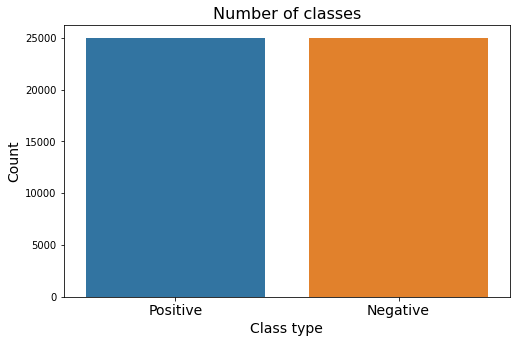

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'sentiment', data =  data_IMDB)
plt.title('Number of classes', fontsize=16)
plt.xlabel('Class type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(range(len(count_result.index)), 
           ['Positive', 'Negative'], 
           fontsize=14)
plt.show()

###### Dataset is balanced

### Removing HTML tags

In [8]:
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def remove_specialChars(text, remove_digits=True):
    text = remove_html(text)
    text = remove_brackets(text)
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

data_IMDB['review']=data_IMDB['review'].apply(remove_specialChars)

In [9]:
data_IMDB['review'].head(10)

0    One of the other reviewers has mentioned that ...
1    A wonderful little production The filming tech...
2    I thought this was a wonderful way to spend ti...
3    Basically theres a family where a little boy J...
4    Petter Matteis Love in the Time of Money is a ...
5    Probably my alltime favorite movie a story of ...
6    I sure would like to see a resurrection of a u...
7    This show was an amazing fresh  innovative ide...
8    Encouraged by the positive comments about this...
9    If you like original gut wrenching laughter yo...
Name: review, dtype: object

### Stemming

In [10]:
def text_lemmatize(text):
    ps= WordNetLemmatizer()#nltk.porter.PorterStemmer()
    #nltk.stem import WordNetLemmatizer
    text= ' '.join([ps.lemmatize(word) for word in text.split()])
    return text

data_IMDB['review']=data_IMDB['review'].apply(text_lemmatize)

### Removing Stopwords

In [11]:
STOP_WORDS = set(stopwords.words('english'))


def Clean_Data():
    x_Review = data_IMDB['review']
    y_Sentiment = data_IMDB['sentiment']
    
    x_Review = x_Review.replace({'<.*?>': ''}, regex = True)         
    x_Review = x_Review.replace({'[^A-Za-z]': ' '}, regex = True)     
    x_Review = x_Review.apply(lambda Rev: [R for R in Rev.split() if R not in STOP_WORDS]) 
    x_Review = x_Review.apply(lambda Rev: [R.lower() for R in Rev])   
    
    y_Sentiment = y_Sentiment.replace('positive', 1)
    y_Sentiment = y_Sentiment.replace('negative', 0)

    return x_Review, y_Sentiment

x_Review, y_Sentiment = Clean_Data()
    

In [12]:
#print(STOP_WORDS)
x_Review.head(10)

0    [one, reviewer, ha, mentioned, watching, oz, e...
1    [a, wonderful, little, production, the, filmin...
2    [i, thought, wa, wonderful, way, spend, time, ...
3    [basically, family, little, boy, jake, think, ...
4    [petter, matteis, love, time, money, visually,...
5    [probably, alltime, favorite, movie, story, se...
6    [i, sure, would, like, see, resurrection, date...
7    [this, show, wa, amazing, fresh, innovative, i...
8    [encouraged, positive, comment, film, i, wa, l...
9    [if, like, original, gut, wrenching, laughter,...
Name: review, dtype: object

In [13]:
x_TrainReview, x_testReview, y_TrainSentiment, y_testSentiment = train_test_split(x_Review, y_Sentiment, test_size = 0.2)


## Encoding and Tokenization

In [14]:
def Maxlength():
    length = []
    for review in x_TrainReview:
        length.append(len(review))

    return int(np.ceil(np.mean(length)))

In [15]:
token = Tokenizer(lower=False)   
token.fit_on_texts(x_TrainReview)



In [77]:
pickle.dump(token, open('IMDB_transform.pkl', 'wb'))

### Standardization

In [23]:
x_TrainReview = token.texts_to_sequences(x_TrainReview)
x_testReview = token.texts_to_sequences(x_testReview)

Review_Maxlength = Maxlength()

x_TrainReview = pad_sequences(x_TrainReview, maxlen=Review_Maxlength, padding='post', truncating='post')
x_testReview = pad_sequences(x_testReview, maxlen=Review_Maxlength, padding='post', truncating='post')

Totalwords = len(token.word_index) + 1   

print('Encoded X Train\n', x_TrainReview, '\n')
print('Encoded X Test\n', x_testReview, '\n')
print('Maximum review length: ', Review_Maxlength)

AttributeError: 'numpy.ndarray' object has no attribute 'translate'

## Data Modelling

In [79]:
EMBED_DIM = 32
LSTM_OUT = 64

model = Sequential()
model.add(Embedding(Totalwords, EMBED_DIM, input_length = Review_Maxlength))
model.add(LSTM(LSTM_OUT))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 131, 32)           5778240   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 5,803,137
Trainable params: 5,803,137
Non-trainable params: 0
_________________________________________________________________
None


In [80]:
checkpoint = ModelCheckpoint(
    'models/IMDB.h5',
    monitor='accuracy',
    save_best_only=True,
    verbose=1
)

In [81]:
model.fit(x_TrainReview, y_TrainSentiment, batch_size = 128, epochs = 5, callbacks=[checkpoint])


Epoch 1/5
313/313 [==============================] - 36s 110ms/step - loss: 0.6257 - accuracy: 0.6300

Epoch 00001: accuracy improved from -inf to 0.63000, saving model to models\LSTM.h5
Epoch 2/5
313/313 [==============================] - 37s 118ms/step - loss: 0.3558 - accuracy: 0.8511

Epoch 00002: accuracy improved from 0.63000 to 0.85107, saving model to models\LSTM.h5
Epoch 3/5
313/313 [==============================] - 38s 121ms/step - loss: 0.1724 - accuracy: 0.9427

Epoch 00003: accuracy improved from 0.85107 to 0.94265, saving model to models\LSTM.h5
Epoch 4/5
313/313 [==============================] - 39s 123ms/step - loss: 0.0873 - accuracy: 0.9760

Epoch 00004: accuracy improved from 0.94265 to 0.97597, saving model to models\LSTM.h5
Epoch 5/5
313/313 [==============================] - 40s 127ms/step - loss: 0.0529 - accuracy: 0.9873

Epoch 00005: accuracy improved from 0.97597 to 0.98733, saving model to models\LSTM.h5


In [83]:
y_pred = model.predict_classes(x_testReview, batch_size = 128)

true = 0
for i, y in enumerate(y_testSentiment):
    if y == y_pred[i]:
        true += 1

print('Correct Prediction: {}'.format(true))
print('Wrong Prediction: {}'.format(len(y_pred) - true))
print('Accuracy: {}'.format(true/len(y_pred)*100))

Correct Prediction: 8640
Wrong Prediction: 1360
Accuracy: 86.4


## Testing the Model

In [28]:
loaded_model = load_model('models/LSTM.h5')


In [79]:
#review = str(input('Movie Review: '))
review = 'lovely movie'

In [80]:

# Pre-process input
regex = re.compile(r'[^a-zA-Z\s]')
review = regex.sub('', review)
print('Cleaned: ', review)

words = review.split(' ')
filtered = [w for w in words if w not in STOP_WORDS]
filtered = ' '.join(filtered)
filtered = [filtered.lower()]

print('Filtered: ', filtered)

Cleaned:  lovely movie
Filtered:  ['lovely movie']


In [81]:
#token1 = Tokenizer(lower=False)   
#token1.fit_on_texts(filtered)


tokenize_words = token.texts_to_sequences(filtered)
tokenize_words = pad_sequences(tokenize_words, maxlen=Review_Maxlength, padding='post', truncating='post')
print(tokenize_words)

[[1264    3    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]]


In [82]:
result = loaded_model.predict(tokenize_words)
print(result)

[[0.8843508]]


In [83]:
if result >= 0.7:
    print('positive')
else:
    print('negative')

positive
